## Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import models, layers, preprocessing

In [2]:
# Laod Data 
df = pd.read_json("D:/Intern/DataSets/News_Category_Dataset_v3.json", lines=True)
df.head(2)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23


In [3]:
data = pd.DataFrame(df, columns=["headline", "category"] )
data.head(2)

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS


In [4]:
data.shape

(209527, 2)

In [5]:
classes = df["category"].unique()
num_classes = len(classes)
print(num_classes)
print(classes)

42
['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']


In [6]:
# Encoding Labels
encoder = LabelEncoder()

data["category"] = encoder.fit_transform(data["category"])
data.sample(2)

,headline,category
63351,5 Travel Booking Secrets That Will Help You Sc...,34
177127,'German Expressionism 1900-1930: Masterpieces ...,7


In [7]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(data["headline"], data["category"], test_size=0.2, random_state=42)

In [8]:
# Tokenization
max_words = 10000
max_len = 50

In [9]:
tokenizer = preprocessing.text.Tokenizer(num_words=max_words, oov_token="<OOV>")

tokenizer.fit_on_texts(X_train)

# Text to Sequence
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


In [10]:
# padding
X_train_pad = preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_len, padding='post')

## LSTM

In [13]:
def lstm_model():
    # Model Architecture
    model = models.Sequential([
		layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
		layers.LSTM(128, return_sequences=False, recurrent_dropout=0.5),
		layers.Dense(64, activation='relu'),
		layers.Dense(num_classes, activation='softmax')
	])
    
    # Model Compilation
    model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [14]:
lstm_model = lstm_model()
lstm_history = lstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_data=(X_test_pad, y_test), verbose=1)

c:\ProgramData\anaconda3\envs\tf\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 68s 50ms/step - accuracy: 0.1695 - loss: 3.2974 - val_accuracy: 0.1707 - val_loss: 3.2847
Epoch 2/5
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 61s 46ms/step - accuracy: 0.1697 - loss: 3.2913 - val_accuracy: 0.1707 - val_loss: 3.2848
Epoch 3/5
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 70s 53ms/step - accuracy: 0.1697 - loss: 3.2908 - val_accuracy: 0.1707 - val_loss: 3.2850
Epoch 4/5
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 61s 47ms/step - accuracy: 0.1697 - loss: 3.2905 - val_accuracy: 0.1707 - val_loss: 3.2841
Epoch 5/5
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 62s 47ms/step - accuracy: 0.1697 - loss: 3.2902 - val_accuracy: 0.1707 - val_loss: 3.2846


## GRU

In [15]:
def gru_model():
    # Model Architecture
	model = models.Sequential([
		layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
		layers.GRU(128, return_sequences=False, recurrent_dropout=0.5),
		layers.Dense(64, activation='relu'),
		layers.Dense(num_classes, activation='softmax')
	])
	
	# Model Compilation
	model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
	
	return model

In [ ]:
gru_model = gru_model()
gru_history = gru_model.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_data=(X_test_pad, y_test), verbose=1)

Epoch 1/5
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 61s 45ms/step - accuracy: 0.1696 - loss: 3.2991 - val_accuracy: 0.1707 - val_loss: 3.2859
Epoch 2/5
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 56s 42ms/step - accuracy: 0.1697 - loss: 3.2916 - val_accuracy: 0.1707 - val_loss: 3.2882
Epoch 3/5
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 57s 43ms/step - accuracy: 0.1697 - loss: 3.2911 - val_accuracy: 0.1707 - val_loss: 3.2859
Epoch 4/5
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 58s 44ms/step - accuracy: 0.1697 - loss: 3.2906 - val_accuracy: 0.1707 - val_loss: 3.2843
Epoch 5/5
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 60s 46ms/step - accuracy: 0.1697 - loss: 3.2902 - val_accuracy: 0.1707 - val_loss: 3.2853


## Model History

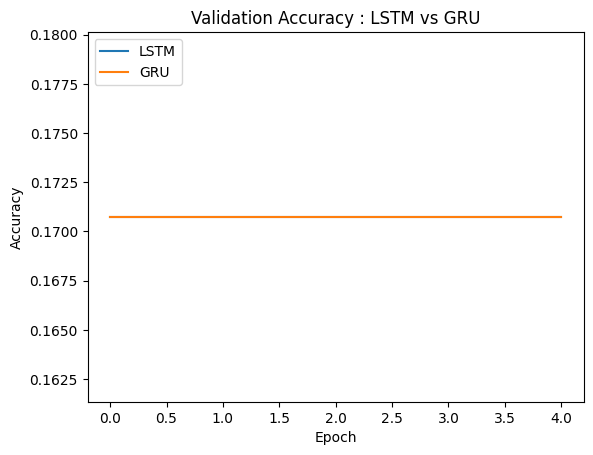

In [17]:
import matplotlib.pyplot as plt

plt.plot(lstm_history.history['val_accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.title('Validation Accuracy : LSTM vs GRU')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LSTM', 'GRU'], loc='upper left')
plt.show()

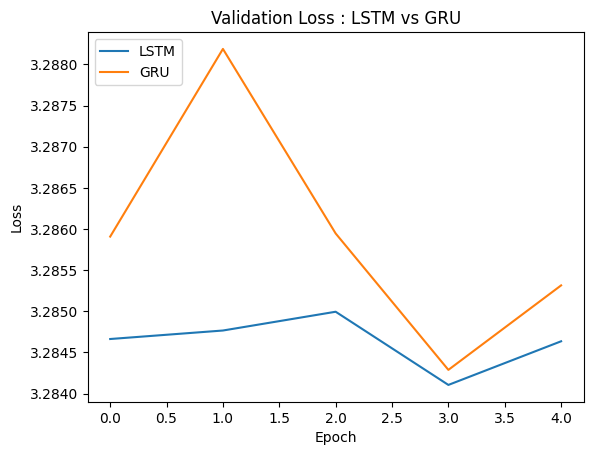

In [18]:
plt.plot(lstm_history.history['val_loss'])
plt.plot(gru_history.history['val_loss'])
plt.title('Validation Loss : LSTM vs GRU')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['LSTM', 'GRU'], loc='upper left')
plt.show()